<u>**STOCK PREDICTION**</u>

**Content:**

Rows are grouped by companies and their age (newest to oldest) on a common date.
The first column is the company. The following are the age, market, date (separated by year, month, day, hour, minute), share volume, various traditional prices of that share (close, open, high…), some price and volume statistics and target.
The target is mainly defined as 1 when the closing price increases by at least 5% in 5 days (open market days). The target is 0 in any other case.

**Context:**

Every data set I found to predict a stock price (investing) aims to find the price for the next day, and only for that stock.
But in practical terms, people like to find the best stocks to buy from an index and wait a few days hoping to get an increase in the price of this investment.

**PURPOSE(possible users):**

Non-professional investors often try to find an interesting stock among those in an index (such as the Standard and Poor's 500, Nasdaq, etc.). They need only one company, the best, and they don't want to fail (perform poorly). So, the metric to optimize is accuracy, described as:

Accuracy = True Positives / (True Positives + False Positives)

And the predictive model can be a binary classifier.

The data covers the price and volume of shares of 31 NASDAQ companies in the year 2022.

**Acknowledgemet:**

Complex features and target were made by executing:
https://www.kaggle.com/code/luisandresgarcia/202307

**Importing necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset to a pandas dataframe:**

In [2]:
data = pd.read_csv('/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv')

In [3]:
data

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


This csv file contains the stock values which was made by different companies over the years.

**Printing first 5 rows of the dataset:**

In [4]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


We know that there are 1285 columns in the dataset.

**Printing 1st 10 rows of the dataset:**

In [5]:
data.head(10)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801553,-1.180000,-7.036376,0


**Printing the last 10 rows of the dataset:**

In [6]:
data.tail(10)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7771,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,ATLO,45.827378,48.222673,...,23.600000,-26.417248,-17.134822,-26.417248,-17.134822,-9.282426,0.938776,0.604294,2.811801,0
7772,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,ATLO,44.016221,69.143430,...,23.600000,-28.900837,-23.695948,-28.900837,-23.695948,-5.204889,9.836735,0.730997,3.432489,0
7773,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,ATLO,51.113614,49.069797,...,23.600000,-9.727156,-21.681747,-9.727156,-21.681747,11.954591,1.428571,0.497078,2.283919,0
7774,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,ATLO,61.385254,47.701266,...,23.600000,27.821310,-3.602228,27.821310,-3.602228,31.423537,0.653061,0.292400,1.303786,0
7775,2022-12-22,23.330000,23.379999,23.049999,23.299999,22.709673,9900,ATLO,61.092635,47.742359,...,23.600000,27.022413,15.038856,27.022413,15.038856,11.983557,0.673469,0.302147,1.348417,0
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,2022-12-30,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


From the above results, we can confirm that there are 7781 entries.

**Getting the information of dataset:**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


**Checking the number of missing values in each column:**

In [8]:
data.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

From this we can see that there is missing values in the dataset.

Next we are going to check, how many missing values are there in the dataset.

In [9]:
data.isnull().sum().sum()

741901

There are 741901 missing values in the dataset.

**Description of the dataset:**

In [10]:
data.describe()

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


**DATA PREPROCESSING:**

Convert date-related columns to datetime objects.

In [11]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [12]:
data

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,year,month,day
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0,2022,1,3
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0,2022,1,4
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0,2022,1,5
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0,2022,1,6
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0,2022,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0,2022,12,23
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0,2022,12,27
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0,2022,12,28
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0,2022,12,29


Handle missing values (replace NaNs with mean or use other imputation methods)

In [13]:
data = data.fillna(data.mean(numeric_only=True))

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [14]:
data

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,year,month,day
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.814790,...,18.673824,18.704812,0.298413,0.919758,-1.900001,-9.664295,0,2022,1,3
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.814790,...,18.673824,18.704812,0.298413,1.110440,-1.379999,-7.247895,0,2022,1,4
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.814790,...,18.673824,18.704812,0.298413,0.889560,-0.930000,-5.201344,0,2022,1,5
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.814790,...,18.673824,18.704812,0.298413,1.497843,-0.360000,-2.177856,0,2022,1,6
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.814790,...,18.673824,18.704812,0.298413,1.188956,-0.120000,-0.758054,0,2022,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,26.223672,27.022465,-0.798793,0.333333,-0.259186,-2.674224,0,2022,12,23
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,30.764722,28.003602,2.761119,0.625850,-0.259186,-2.674224,0,2022,12,27
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,30.764722,29.251039,1.513683,1.034014,-0.259186,-2.674224,0,2022,12,28
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,46.457382,35.995609,10.461773,0.482993,-0.259186,-2.674224,0,2022,12,29


**Feature Selection**

In [15]:
selected_features = ['open', 'high', 'low', 'close', 'adjclose', 'volume', 'TARGET', 'year', 'month', 'day']
data_selected = data[selected_features]

**Train-test split**

In [16]:
X = data_selected.drop(['TARGET'], axis=1)
y = data_selected['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.dtypes)

open        float64
high        float64
low         float64
close       float64
adjclose    float64
volume        int64
year          int32
month         int32
day           int32
dtype: object


In [18]:
print(np.isnan(X_train).any())

open        False
high        False
low         False
close       False
adjclose    False
volume      False
year        False
month       False
day         False
dtype: bool


In [19]:
print(np.isinf(X_train).any())

open        False
high        False
low         False
close       False
adjclose    False
volume      False
year        False
month       False
day         False
dtype: bool


**Feature Scaling**

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Building**

In [21]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

**Model Prediction**

In [22]:
y_pred = model.predict(X_test_scaled)

**Model Evaluation**

In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8137443802183687
Confusion Matrix:
[[1267    1]
 [ 289    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1268
           1       0.00      0.00      0.00       289

    accuracy                           0.81      1557
   macro avg       0.41      0.50      0.45      1557
weighted avg       0.66      0.81      0.73      1557



**Visualize Results**

Confusion Matrix Heatmap

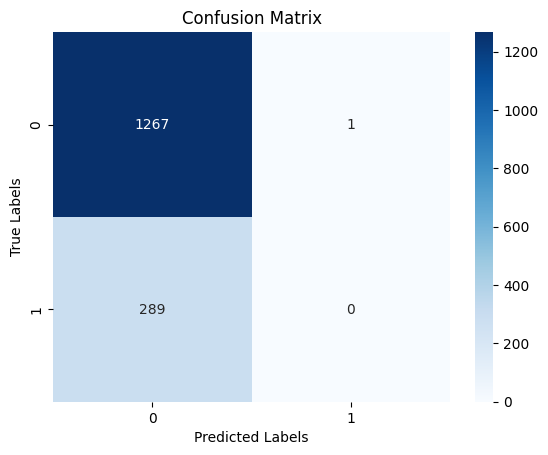

In [25]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Correlation matrix & Heat Map**

Drop the 'ticker' column because it contains float value, since we can't draw correlation matrix and heat mao.

In [26]:
data1 = data.drop('ticker', axis=1)

Recalculate the correlation matrix after dropping the column.

In [27]:
correlation_matrix = data1.corr()

Create a heatmap

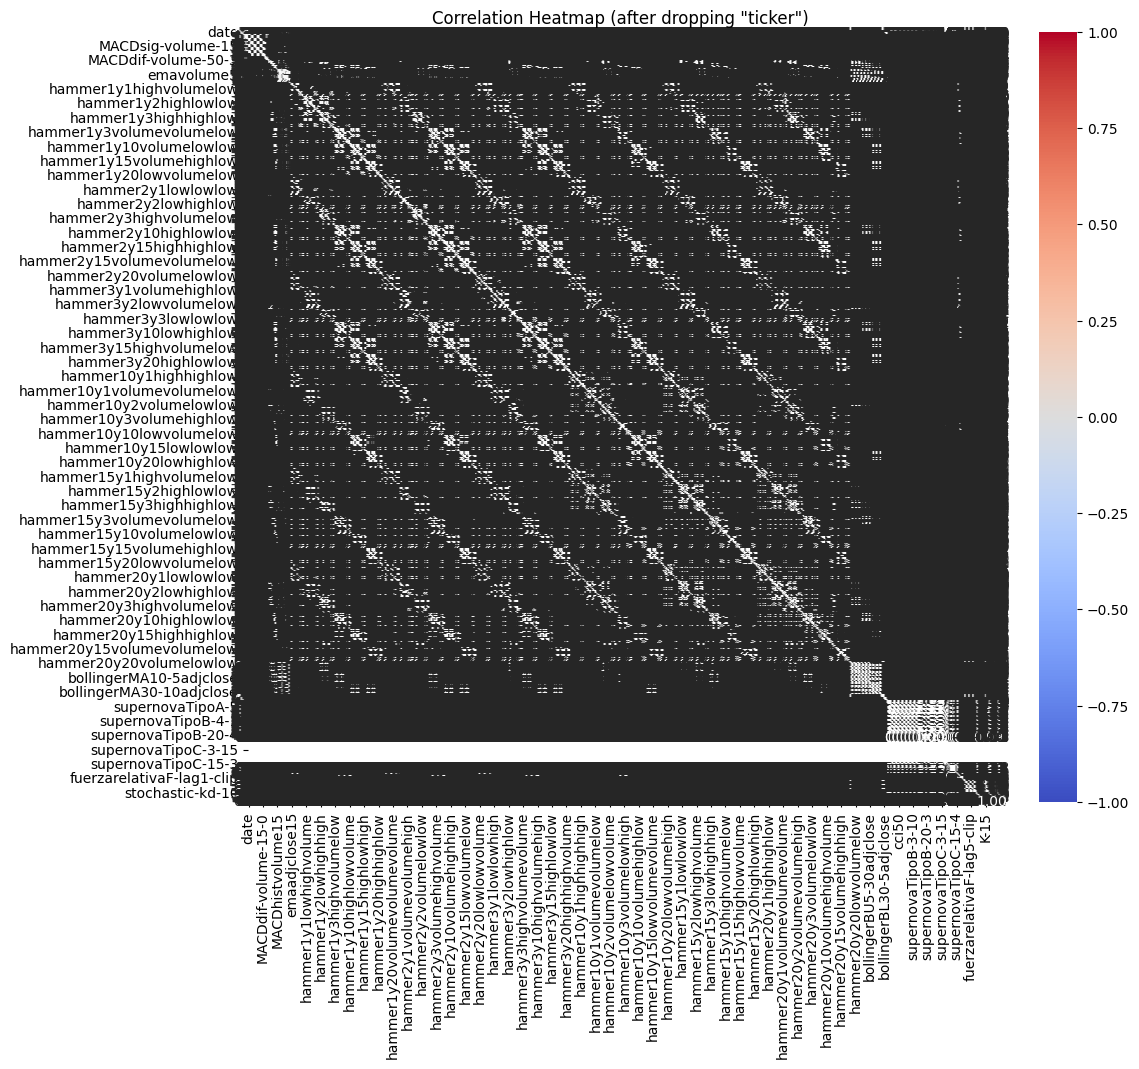

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (after dropping "ticker")')
plt.show()